In [1]:
cd ..

/home/sallinen/Programmation/predicting-poverty-through-time/src


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from lib import estimator_util as eu
from lib import clusters_utils as cl

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from os import listdir
from os.path import isfile, join

In [4]:
sns.set_theme()

In [5]:
def cnn_osm2(complete, model_, country, display_plot=False, **params):
        tmp_df = complete.loc[complete.country == country]

        years = tmp_df.groupby(["year"]).groups.keys()
        year = max(years)
        recent_df_complete = tmp_df.loc[tmp_df.year == year]
        split_map = cl.split_k_sets(10, lat=recent_df_complete["lat"], lon=recent_df_complete["lon"])
        X, y = eu.get_recent_features(tmp_df, [country], all_cols)
        r2, y_real, y_predicted, trained_model = eu.run_model(X, y, model_, seed=1, kf= cl.folds_from_split(split_map), **params)
        fig = eu.plot_predictions(y_real, y_predicted, r2, country, year)
        fig.savefig(f"../figs/{country}_{year}_cnnosm_{model_.__name__}.pdf", dpi=600)
        return r2

resnet_trans_all_countries_hyper_ncomp_10.csv
10
resnet_trans_all_countries_hyper_ncomp_3.csv
3
resnet_trans_all_countries_hyper_ncomp_100.csv
00
resnet_trans_all_countries_hyper_ncomp_87.csv
87


KeyboardInterrupt: 

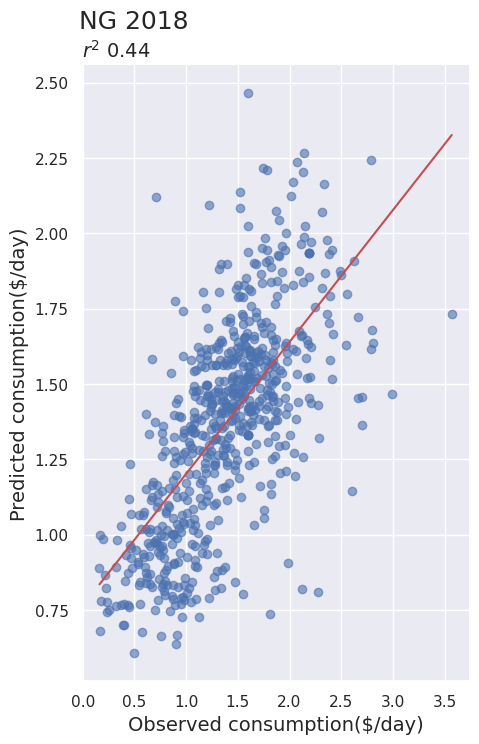

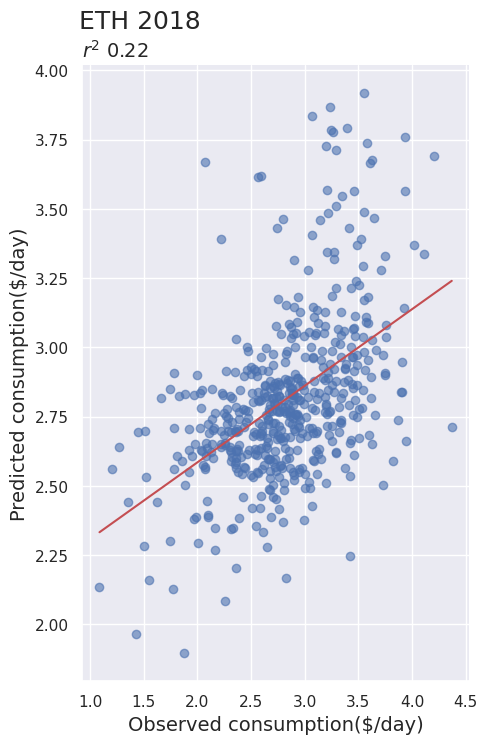

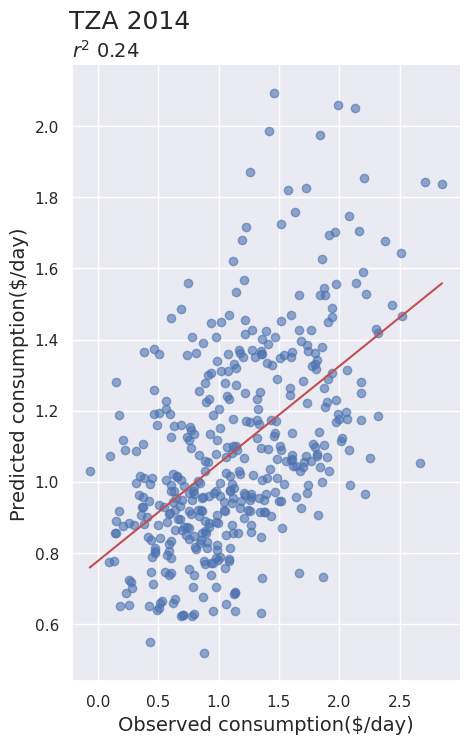

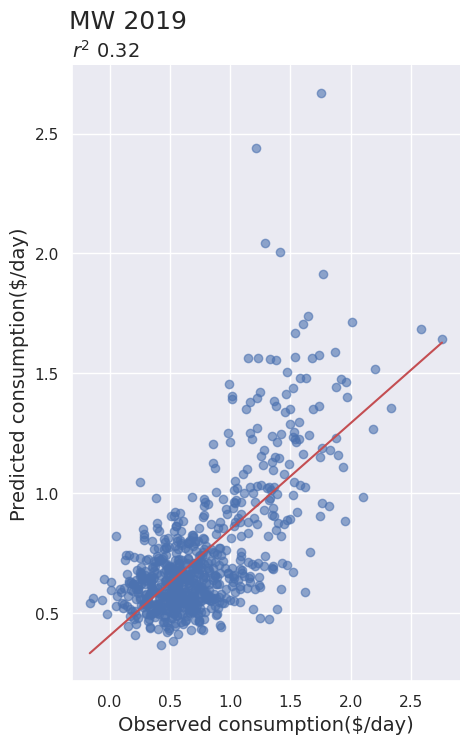

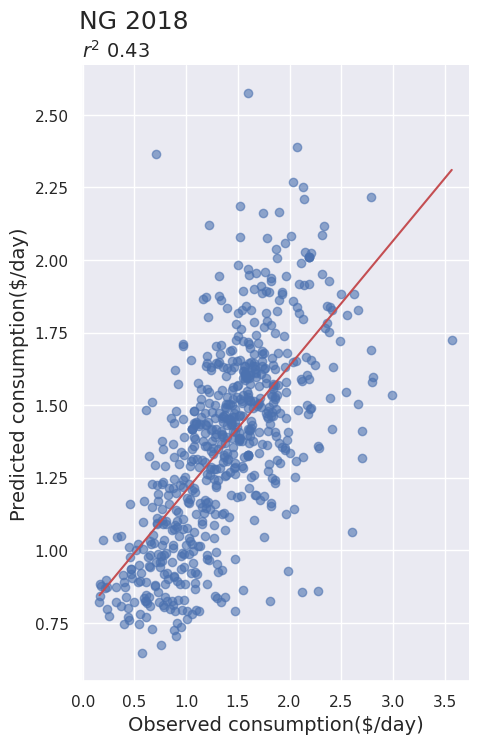

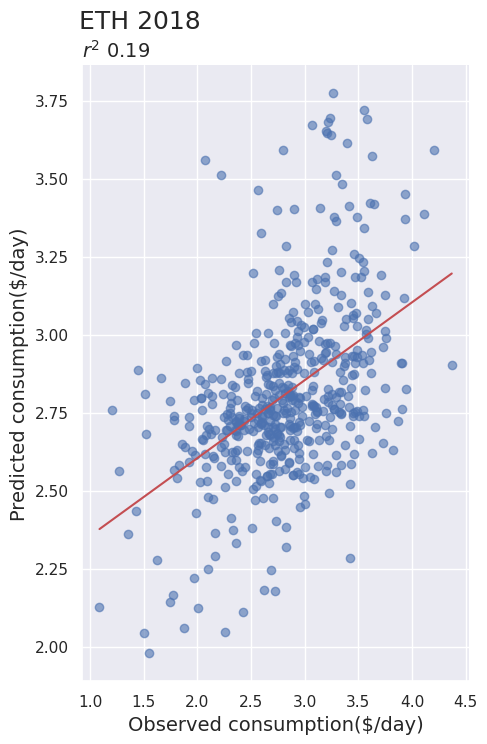

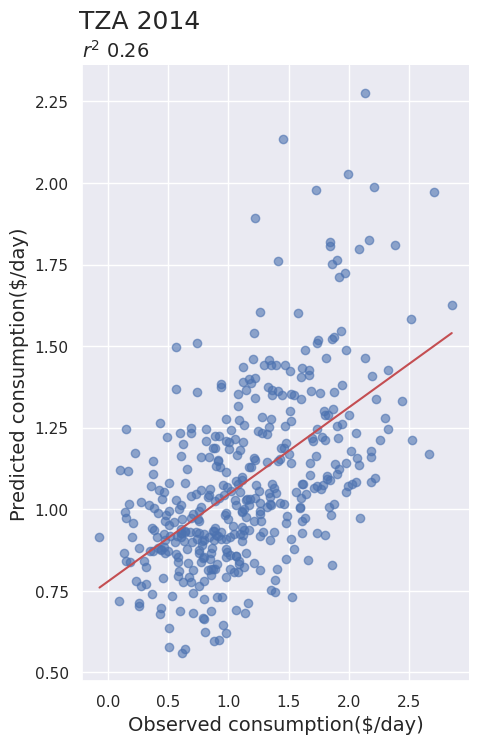

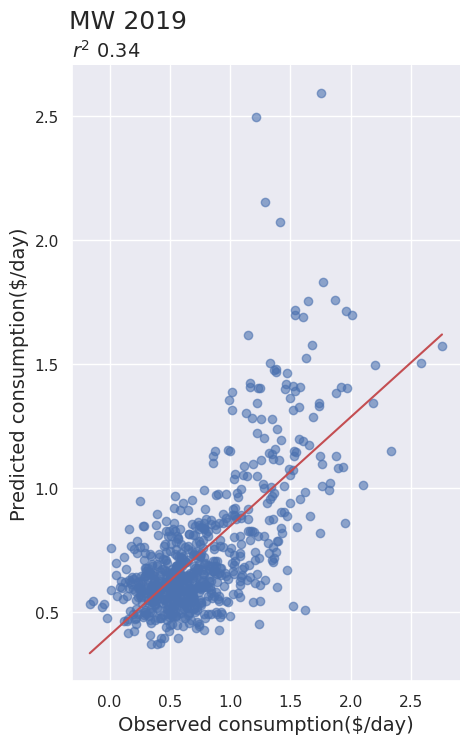

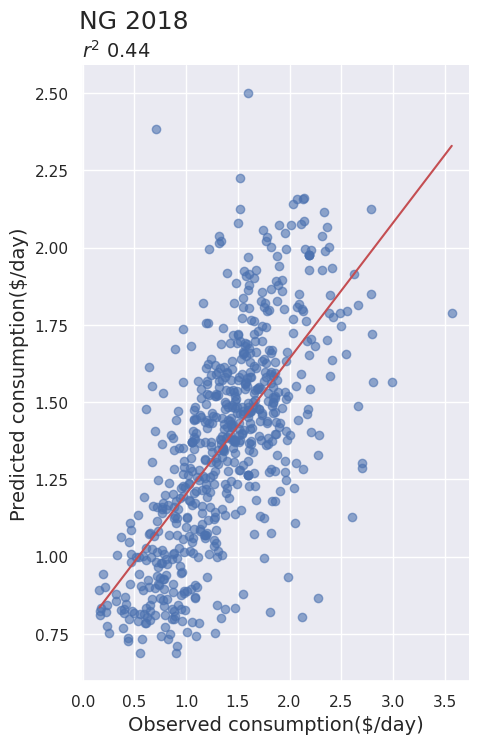

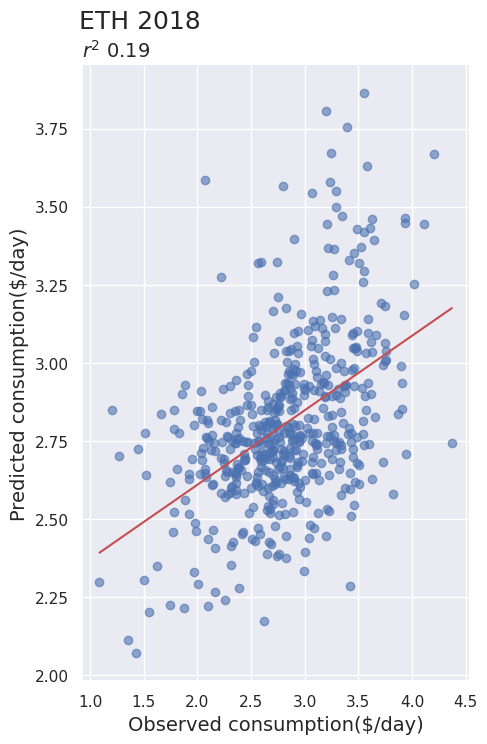

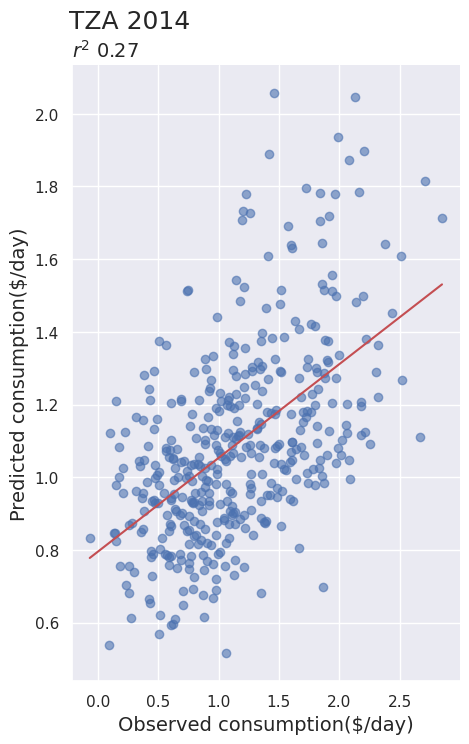

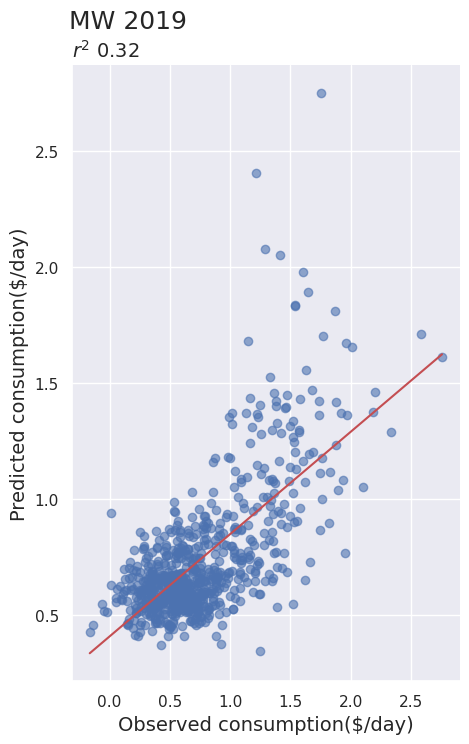

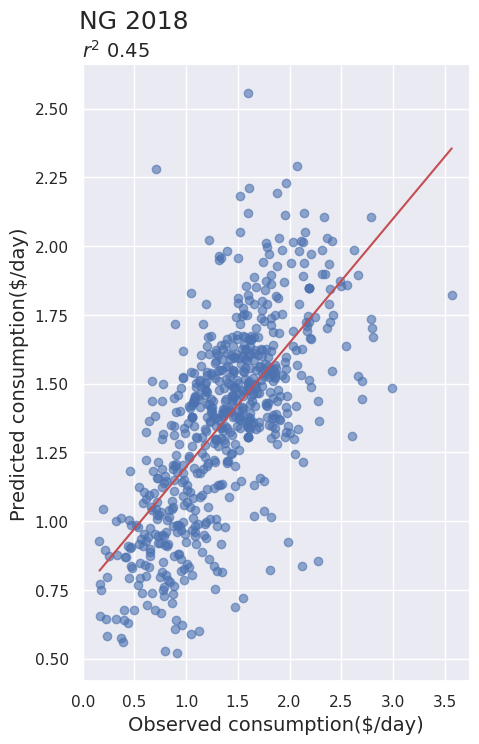

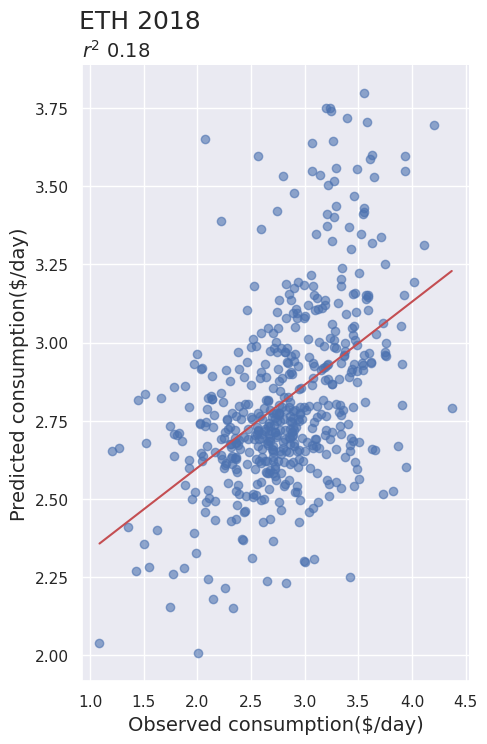

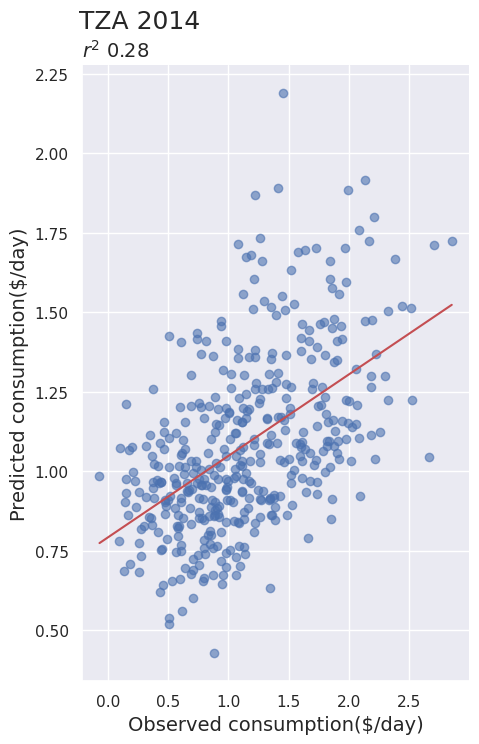

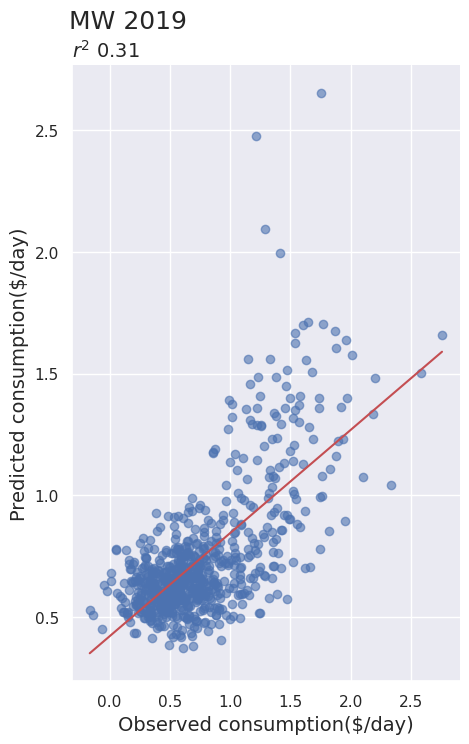

In [7]:
files = [f for f in listdir("../data/cnn_features/") if isfile(join("../data/cnn_features/", f))]
files = list(filter(lambda a: 'ncomp' in a, files))
countries = ["NG", "ETH" ,"TZA", "MW"]
r2 = np.zeros((len(files),len(countries)))
nb_cluster = []

for i, f in enumerate(files):
    complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/"+ f, "../data/")
    k = f[-6:-4].replace('_', '')
    nb_cluster.append(int(k))
    for j,country in enumerate(countries):
        r2[i,j] = cnn_osm2(complete_df, Ridge, country, alpha = 1000)

In [ ]:
df = pd.DataFrame(r2, columns=countries)
df.insert(0, 'k', nb_cluster)
df = df.sort_values('k')
display(df)

In [ ]:
for country in countries :
    plt.plot(df['k'], df[country], label=country)
plt.xlabel('k')
plt.ylabel('r2')
plt.legend()

In [ ]:
df2 = df[countries].mean(axis=1)
plt.plot(df['k'], df2)
plt.xlabel('k')
plt.ylabel('mean r2 for 4 countries')